In [4]:
!pip install d2l

**4.8.1.1. 梯度消失**

从历史上看，sigmoid函数 1/(1+exp(−x)) （ 4.1节 提到过）很流行，因为它类似于阈值函数。由于早期的人工神经网络受到生物神经网络的启发，神经元要么完全激活要么完全不激活（就像生物神经元）的想法很有吸引力。让我们仔细看看sigmoid函数为什么会导致梯度消失。

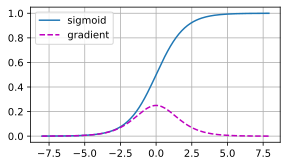

In [5]:
%matplotlib inline
import torch
from d2l import torch as d2l

x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.sigmoid(x)
y.backward(torch.ones_like(x))

d2l.plot(x.detach().numpy(), [y.detach().numpy(), x.grad.numpy()],
         legend=['sigmoid', 'gradient'], figsize=(4.5, 2.5))

**4.8.1.2. 梯度爆炸**

相反的问题，当梯度爆炸时，可能同样令人烦恼。为了更好地说明这一点，我们生成100个高斯随机矩阵，并将它们与某个初始矩阵相乘。对于我们选择的尺度（方差 σ2=1 ），矩阵乘积发生爆炸。当这种情况是由于深度网络的初始化所导致时，我们没有机会让梯度下降优化器收敛。

In [6]:
M = torch.normal(0, 1, size=(4, 4))
print('一个矩阵 \n', M)
for i in range(100):
    M = torch.mm(M, torch.normal(0, 1, size=(4, 4)))

print('乘以100个矩阵后\n', M)

一个矩阵 
 tensor([[ 0.3350,  0.5667, -0.7826, -0.0699],
        [ 0.8641, -0.0708,  0.2837,  0.0514],
        [ 0.9416,  0.2727, -0.5295,  0.8156],
        [ 0.2649,  0.4310,  0.1156, -0.6068]])
乘以100个矩阵后
 tensor([[-1.8745e+24, -2.8452e+24,  7.3474e+23,  6.0860e+21],
        [-2.1763e+24, -3.3033e+24,  8.5303e+23,  7.0656e+21],
        [-3.2337e+24, -4.9082e+24,  1.2675e+24,  1.0499e+22],
        [-1.6793e+24, -2.5489e+24,  6.5824e+23,  5.4524e+21]])
